In [1]:
import pandas as pd
import torch

sign_train_df = pd.read_csv('archive/sign_mnist_train.csv', sep=',')
sign_test_df = pd.read_csv('archive/sign_mnist_test.csv', sep=',')

In [2]:
sign_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
sign_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93
27454,23,179,180,180,180,182,181,182,183,182,...,108,132,170,194,214,203,197,205,209,215


In [4]:
sign_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
print(sign_train_df.shape)
print(sign_test_df.shape)

(27455, 785)
(7172, 785)


In [6]:
import numpy as np

training = np.array(sign_train_df, dtype='float32')
testing = np.array(sign_test_df, dtype='float32')

In [7]:
print(training.shape)
print(testing.shape)

(27455, 785)
(7172, 785)


In [8]:
training

array([[  3., 107., 118., ..., 204., 203., 202.],
       [  6., 155., 157., ..., 103., 135., 149.],
       [  2., 187., 188., ..., 195., 194., 195.],
       ...,
       [ 18., 174., 174., ..., 202., 200., 200.],
       [ 17., 177., 181., ...,  64.,  87.,  93.],
       [ 23., 179., 180., ..., 205., 209., 215.]], dtype=float32)

In [9]:
testing

array([[  6., 149., 149., ..., 112., 120., 107.],
       [  5., 126., 128., ..., 184., 182., 180.],
       [ 10.,  85.,  88., ..., 225., 224., 222.],
       ...,
       [  2., 190., 191., ..., 211., 209., 208.],
       [  4., 201., 205., ...,  67.,  70.,  63.],
       [  2., 173., 174., ..., 195., 193., 192.]], dtype=float32)

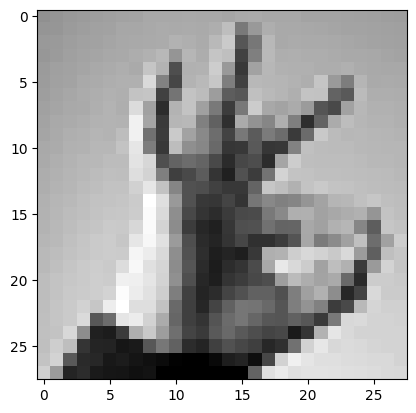

In [10]:
import random
import matplotlib.pyplot as plt

i = random.randint(1, 27455)
# plt.imshow(training[i,1:].reshape((28,28)))
plt.imshow(training[i,1:].reshape((28,28)), cmap='gray')

In [11]:
label = training[i,0]
label

np.float32(5.0)

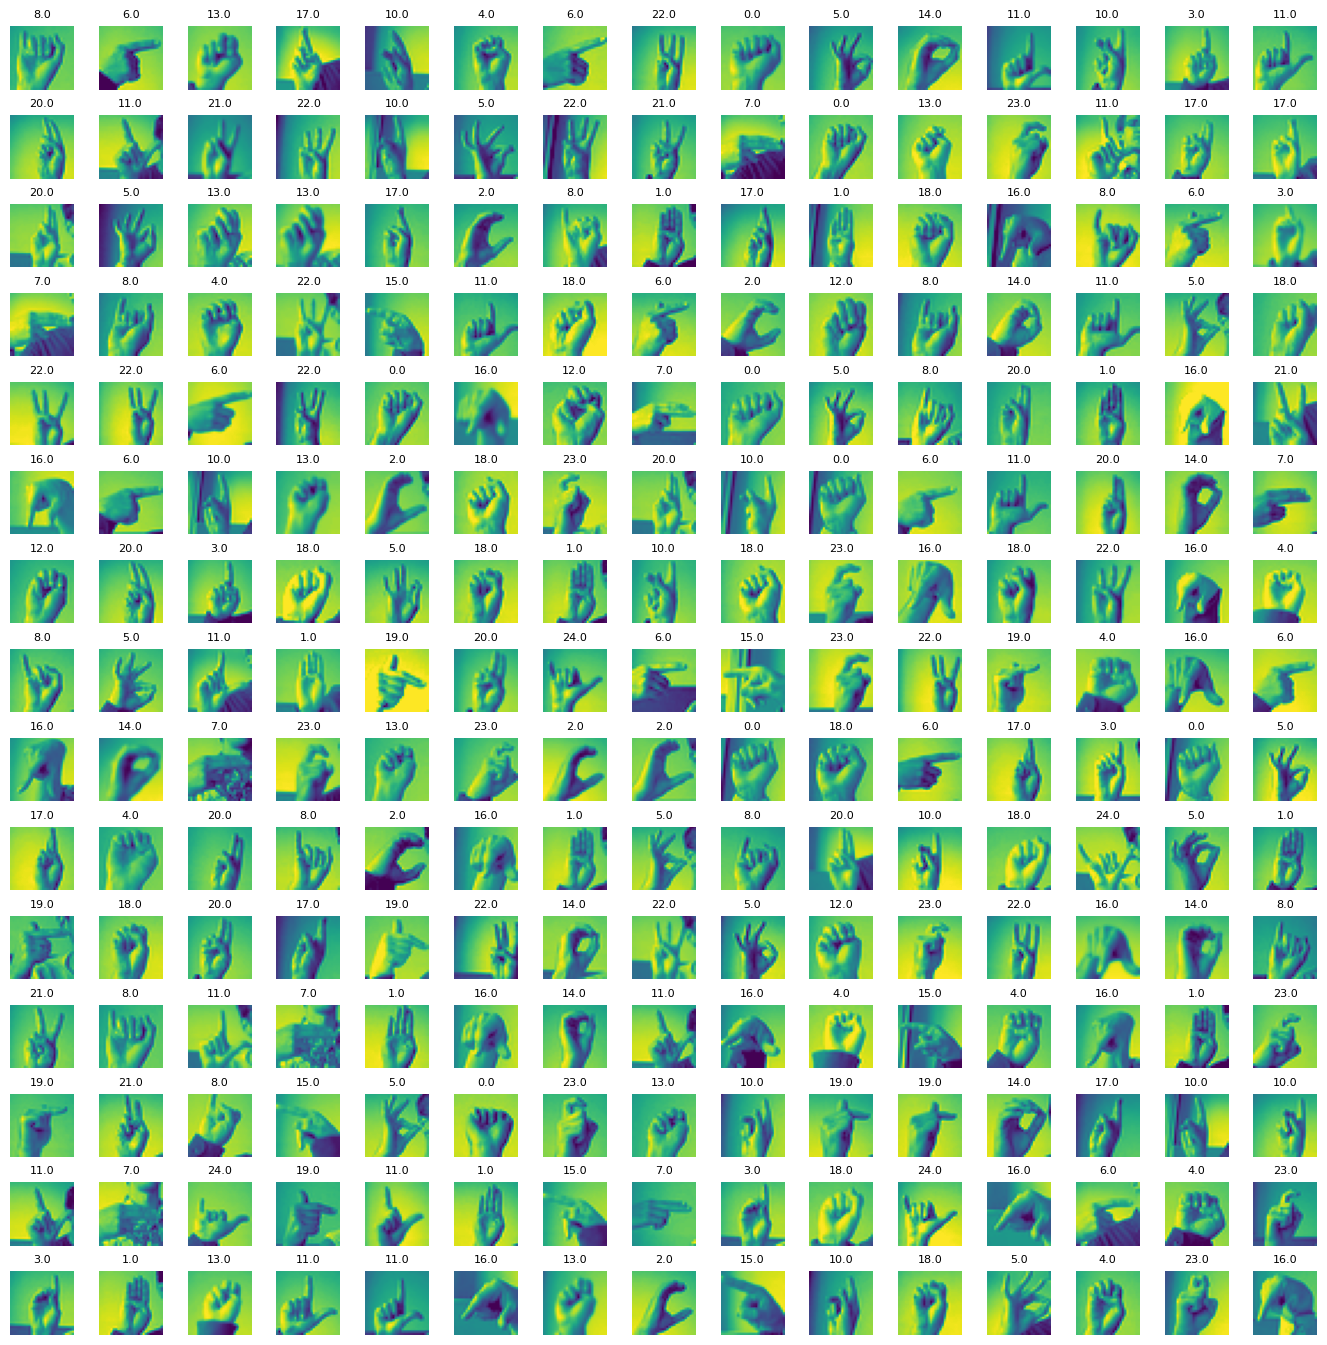

In [12]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))
axes = axes.ravel()
n_training = len(training)
for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [13]:
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [15]:
print(X_train.shape)
print(y_train.shape)

(21964, 784)
(21964,)


In [16]:
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28, 28, 1))

X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
X_validate = torch.from_numpy(X_validate)
y_train = torch.from_numpy(y_train)
y_validate = torch.from_numpy(y_validate)
y_test = torch.from_numpy(y_test)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)

torch.Size([21964, 28, 28, 1])
torch.Size([7172, 28, 28, 1])
torch.Size([5491, 28, 28, 1])


In [18]:
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1, stride=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1)
        self.pool = nn.MaxPool2d(kernel_size=2, padding=1)
        self.dropout = nn.Dropout(0.25)
        self.fc1 = nn.Linear(128 * 8 * 8, 64)
        self.fc2 = nn.Linear(64, 26)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.view(-1, 128 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

nn_model = CNNModel()

In [19]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.01)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_validate, y_validate)

In [21]:
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=512)
val_loader = DataLoader(val_dataset, shuffle=True, batch_size=512)

In [22]:
epochs = 25
history = {
    "train_loss": [],
    "val_loss": [],
    "train_acc": [],
    "val_acc": []
}

for epoch in range(epochs):
    nn_model.train()
    running_loss = 0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs = inputs.permute(0, 3, 1, 2)
        outputs = nn_model(inputs)
        labels = labels.long()
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss/len(train_loader)
    train_acc = 100 * correct/total

    nn_model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.permute(0, 3, 1, 2)
            outputs = nn_model(inputs)
            labels = labels.long()
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss = val_loss/len(val_loader)
    val_acc = 100*correct/total

    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)

    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

Epoch [1/25], Train Loss: 2.8848, Train Acc: 23.74%, Val Loss: 2.5623, Val Acc: 49.41%
Epoch [2/25], Train Loss: 2.5063, Train Acc: 59.94%, Val Loss: 2.4444, Val Acc: 67.24%
Epoch [3/25], Train Loss: 2.4317, Train Acc: 72.32%, Val Loss: 2.3924, Val Acc: 82.08%
Epoch [4/25], Train Loss: 2.4014, Train Acc: 79.88%, Val Loss: 2.3759, Val Acc: 85.10%
Epoch [5/25], Train Loss: 2.3826, Train Acc: 84.47%, Val Loss: 2.3663, Val Acc: 89.95%
Epoch [6/25], Train Loss: 2.3725, Train Acc: 87.69%, Val Loss: 2.3589, Val Acc: 91.88%
Epoch [7/25], Train Loss: 2.3616, Train Acc: 90.61%, Val Loss: 2.3507, Val Acc: 92.28%
Epoch [8/25], Train Loss: 2.3546, Train Acc: 92.35%, Val Loss: 2.3430, Val Acc: 94.28%
Epoch [9/25], Train Loss: 2.3530, Train Acc: 93.08%, Val Loss: 2.3397, Val Acc: 94.92%
Epoch [10/25], Train Loss: 2.3465, Train Acc: 94.34%, Val Loss: 2.3374, Val Acc: 95.34%
Epoch [11/25], Train Loss: 2.3453, Train Acc: 94.84%, Val Loss: 2.3354, Val Acc: 96.79%
Epoch [12/25], Train Loss: 2.3445, Train 

In [23]:
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, shuffle=True, batch_size=512)

In [32]:
with torch.no_grad():
    nn_model.eval()
    test_loss = 0
    correct = 0
    total = 0

    for inputs, labels in test_loader:
            inputs = inputs.permute(0, 3, 1, 2)
            outputs = nn_model(inputs)
            labels = labels.long()
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    test_loss = test_loss/len(test_loader)
    test_acc = 100*correct/total

print(f'test_loss: {test_loss}, test_acc: {test_acc}')

test_loss: 2.392729727427165, test_acc: 92.34523145566091
